<a href="https://colab.research.google.com/github/Shivanshjoshi11/Diabetes_Prediction/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files.upload() 

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shivanshj","key":"f771b65b6f47953b718bd90f82bc6fff"}'}

In [3]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [4]:
!dir

kaggle.json  sample_data


In [5]:
!kaggle datasets download -d uciml/pima-indians-diabetes-database

  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 13.8MB/s]


In [6]:
!unzip \*.zip  && rm *.zip


Archive:  pima-indians-diabetes-database.zip
  inflating: diabetes.csv            


In [7]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('diabetes.csv')

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


 IN THE DATASET WE DONT HAVE A NULL VALUE OR MISSING VALUE BUT THERE ARE FEW FEATURES WITH VALUE EQUAL TO ZERO WHICH IS NOT ACCURATE.

LETS LOOK AT THE FEATURES WITH VALUES EQUAL TO ZERO

In [11]:
(df == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

LETS LOOK AT THE DIST PLOTS OF THESE FEATURES BEFORE DECIDING WHT TO DO WITH THE ZERO VALUES

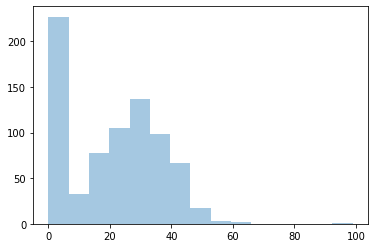

In [12]:
sns.distplot(x = df['SkinThickness'] , kde = False)

In [13]:
def df_distplot(feature_list):
  rows = len(feature_list)
  f, axes = plt.subplots(rows , 1 , figsize = (rows,40))
  for row , feature in enumerate (feature_list):
      sns.distplot(df[feature], ax=axes[row] , axlabel = feature)

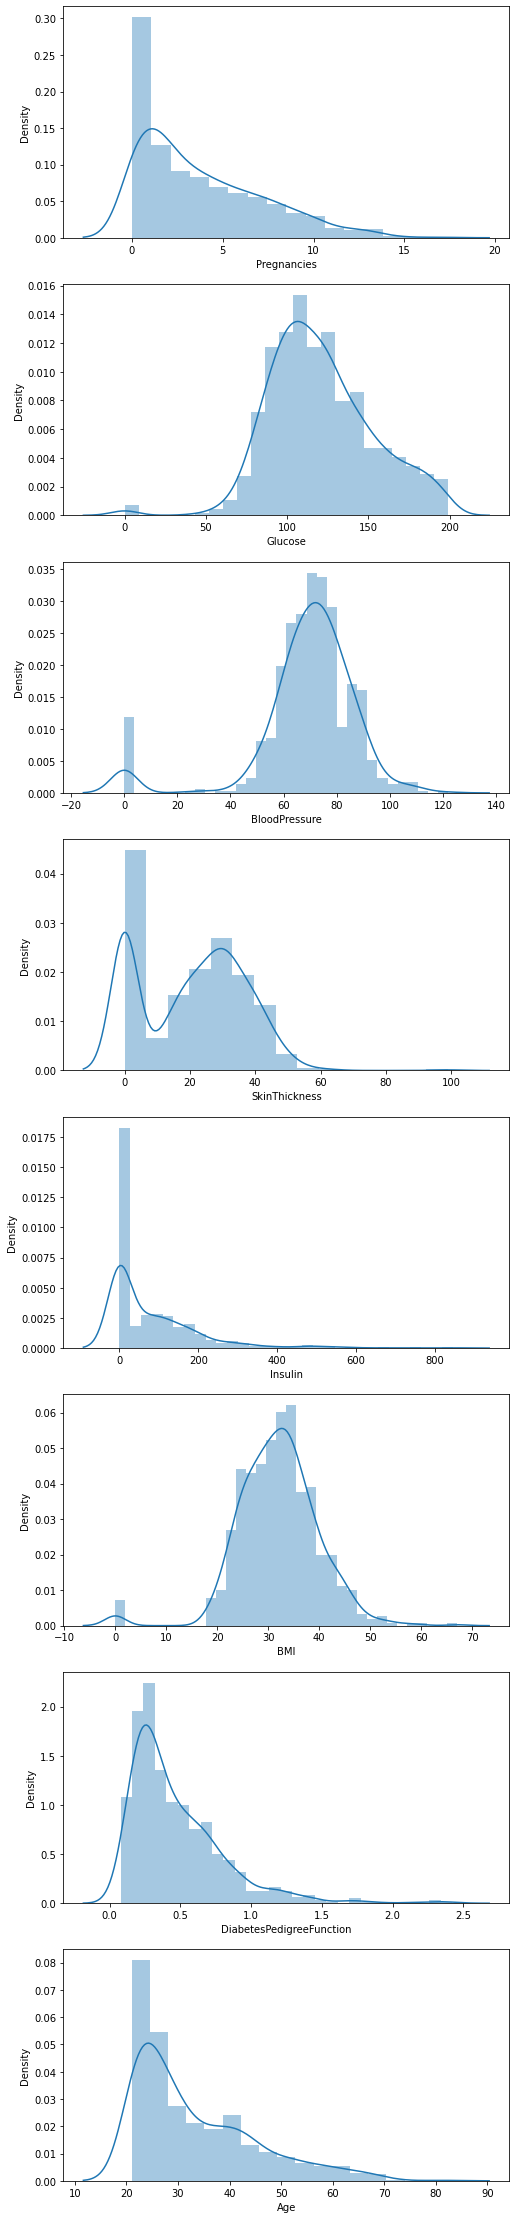

In [14]:
columns = list(df.columns)[:-1]
df_distplot(columns)

As we can see that there are a lot of features which have values equal to zero 
  

<ol> 
     <li> pregnancies </li>
     <li> glucose </li>
     <li> blood sugar </li>
     <li> skin thickness </li>
     <li> insulin </li>
     <li> BMI </li>
</ol>
Among these we won't choose pregnancies as its value can be equal to zero

So now we have 2 approaches-
1. converting 0 values to nan values 
2. replacing 0 values with the minimum value for than feature. (there is a minimum value for the percentage of glucose in body, so I can also replace that minimum value in place of 0)

Problems :
1. There is a chance that 0 actually represent the minimum value and if that is the case then it will be a big misjudgement

2. 0 could also be a nan value and if we replace it with the biologically minimum value then it might cause problem


But i will be going on with replacing 0 with nan value and then  nan value with the mean/mode of the data





In [15]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

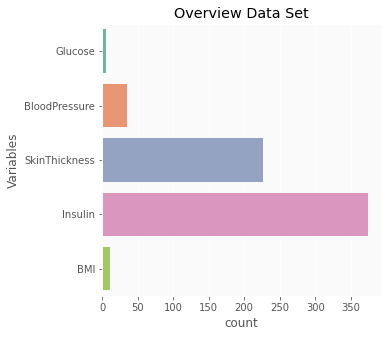

In [16]:
df_null = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].isnull()

plt.style.use('ggplot') # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(5, 5))

ax.set_facecolor('#fafafa')
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.countplot(data = df_null[df_null == True], 
  orient = 'h', 
  palette = 'Set2')

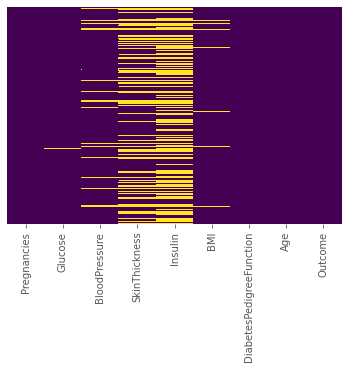

In [17]:
sns.heatmap(df.isnull() , yticklabels = False , cmap = 'viridis' , cbar = False)

Now we can see the number of missing values in the data

So we will now look at the distribution of the features using the df_distplot() which we created previously

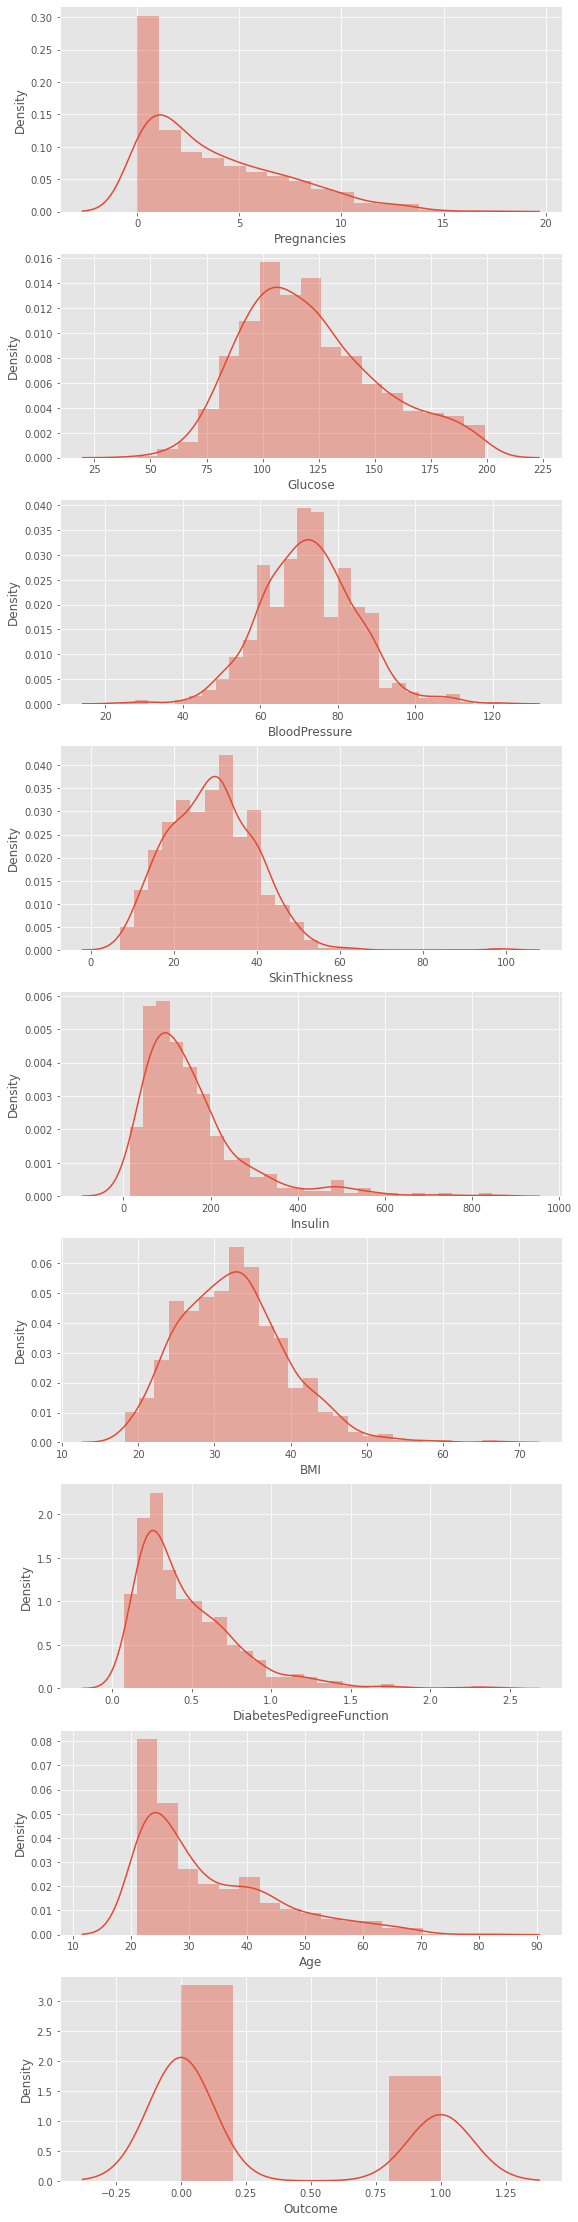

In [18]:
columns = list(df.columns)
df_distplot( columns)

So now we will be replacing the nan values with either mean or median.



When to replace nan with the mean:-


*  If the feature follows normal distribution then we replace the nan with the mean of the column

When to replace nan with median:-
* If the feature doesnot follows normal distribution then we replace nan with the median of the column




In [19]:
def nan_mean(var):   
    for var in var:
        temp = df.groupby(['Outcome'])[[var]].mean()[var]
        df.loc[(df['{}'.format('Outcome')] == 0 ) & (df[var].isnull()), var] = temp[0]
        df.loc[(df['{}'.format('Outcome')] == 1 ) & (df[var].isnull()), var] = temp[1]

In [20]:
columns = ['Insulin' , 'SkinThickness' , 'BMI']
nan_mean(columns)

In [21]:
def nan_median(var):   
    for var in var:
        temp = df.groupby(['Outcome'])[[var]].median()[var]
        df.loc[(df['{}'.format('Outcome')] == 0 ) & (df[var].isnull()), var] = temp[0]
        df.loc[(df['{}'.format('Outcome')] == 1 ) & (df[var].isnull()), var] = temp[1]

In [22]:
columns = ['Glucose' , 'BloodPressure']
nan_median(columns)

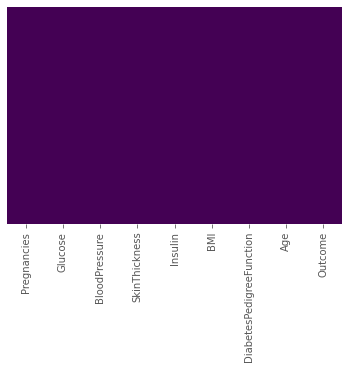

In [23]:
sns.heatmap(df.isnull() , yticklabels = False , cmap = 'viridis' , cbar = False)

In [24]:
def df_boxplot(feature_list):
  rows = len(feature_list)
  f, axes = plt.subplots(rows , 1 , figsize = (rows,25))
  for row , feature in enumerate (feature_list):
      sns.distplot(df[feature], ax=axes[row])

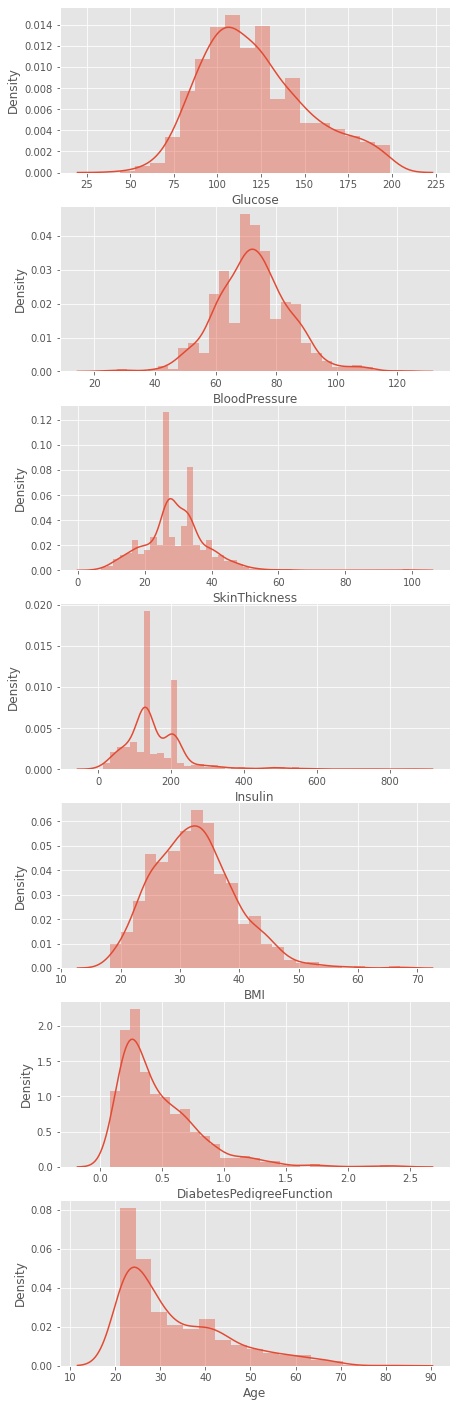

In [25]:
columns = ['Glucose' , 'BloodPressure' , 'SkinThickness' , 'Insulin' , 'BMI' , 'DiabetesPedigreeFunction' , 'Age']
df_boxplot(columns)

In [26]:
from sklearn.model_selection import train_test_split

X = df.drop(['Outcome'] , axis = 1)
y = df['Outcome']

X_train , X_test , y_train , y_test = train_test_split(X , y)

In [50]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=80, random_state=32)
clf.fit(X_train , y_train)

y_pred = clf.predict(X_test)

In [51]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[122  10]
 [  6  54]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       132
           1       0.84      0.90      0.87        60

    accuracy                           0.92       192
   macro avg       0.90      0.91      0.90       192
weighted avg       0.92      0.92      0.92       192

